In [314]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
label = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[0]
image = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
original_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[0]
og_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\rendered.npz", allow_pickle=True)
#print(label)
#print(len(label))
data_params = ['reward', 'observation$compassAngle', 'observation$inventory$dirt', 'action$forward', 'action$left', 'action$back', 'action$right', 'action$jump', 'action$sneak', 'action$sprint', 'action$attack', 'action$camera', 'action$place']

print([len(og_label[i]) for i in data_params[3:]])
print(label.shape)
print(label)
actual_frames = len(og_label["reward"])
#image = image[-actual_frames:]
print(image.shape)


file_names = [folder_name for folder_name in os.listdir(path+"\\MineRLNavigateDense-v0")]

train_data = file_names[:160]
#train_data = file_names[:2]
valid_data = file_names[160:190]

#idx = 0

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size):
        self.batch_size = batch_size
        self.data = data
        self.video_file_no = 0
        self.video_frame_no = batch_size

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
    
    '''def __next__(self):
        return self.getitem()'''

    def __getitem__(self, idx):
        #batch_x = self.data[idx * self.batch_size : (idx+1) * self.batch_size]
        video = self.data[self.video_file_no]
        
        image_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[0]])
        label_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[1]])[0][:1]
        print(label_part)
        
        print(image_part.shape)
        no_of_frames = int(np.array(image_part[0]).shape[0]/12288)
        image_part = np.array(image_part[0]).reshape(no_of_frames, 64, 64, 3)[-label_part[0].shape[0]:]
        image_part = np.asarray(image_part[idx * self.batch_size : (idx+1) * self.batch_size]).astype("float32")
        image_part = image_part.reshape(-1, 64, 64, 3)
        plt.imshow(np.array(image_part).astype(np.uint8)[-1])
        plt.show()
        
        print(np.array(image_part).dtype)
        print(np.array(image_part).shape)
        #print(np.array([image_part, label_part]).shape)
        
        self.video_frame_no += batch_size
        if self.video_frame_no > no_of_frames and len(self.data) != self.video_file_no:
            self.video_file_no += 1
            
        return image_part, label_part[0]
    
batch_size = 1

training_gen = DataGenerator(train_data, batch_size)
valid_gen = DataGenerator(valid_data, batch_size)

#dg = DataGenerator(file_names, batch_size)
#for x in range(2):
    #plt.imshow(np.array(next(dg))[0].reshape(1792, 64, 64, 3).astype(np.uint8)[50])
    #plt.imshow(np.array(next(dg))[0].astype(np.uint8)[10])
    #plt.show()

#print(DataGenerator())

[1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792]
(16129,)
[0 0 0 ... 0 0 0]
(1832, 64, 64, 3)


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import tensorflow as tf
import tqdm
import os

[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


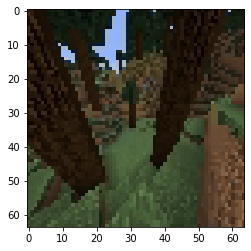

float32
(1, 64, 64, 3)
[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


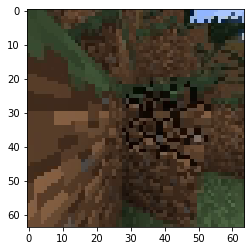

float32
(1, 64, 64, 3)
   1/1000 [..............................] - ETA: 0s - loss: 5.6530 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


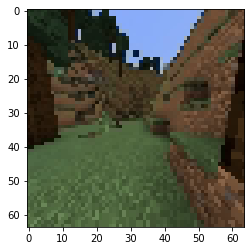

float32
(1, 64, 64, 3)
   2/1000 [..............................] - ETA: 15:23 - loss: 5.6327 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


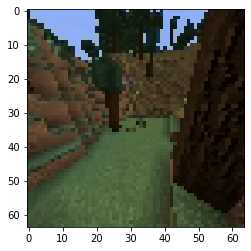

float32
(1, 64, 64, 3)
   3/1000 [..............................] - ETA: 20:37 - loss: 5.6426 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


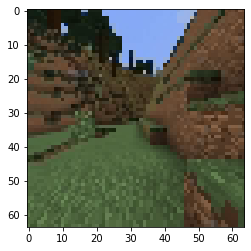

float32
(1, 64, 64, 3)
   4/1000 [..............................] - ETA: 23:11 - loss: 5.6476 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


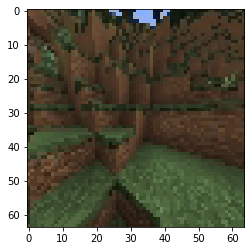

float32
(1, 64, 64, 3)
   5/1000 [..............................] - ETA: 24:41 - loss: 5.6506 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


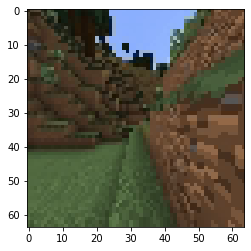

float32
(1, 64, 64, 3)
   6/1000 [..............................] - ETA: 26:40 - loss: 5.6526 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


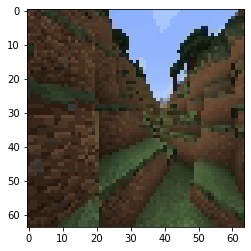

float32
(1, 64, 64, 3)
   7/1000 [..............................] - ETA: 28:22 - loss: 5.6540 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


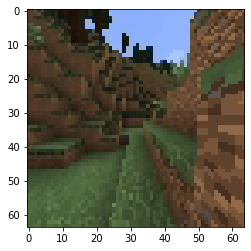

float32
(1, 64, 64, 3)
   8/1000 [..............................] - ETA: 29:50 - loss: 5.6550 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


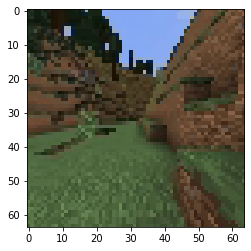

float32
(1, 64, 64, 3)
   9/1000 [..............................] - ETA: 30:15 - loss: 5.6559 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


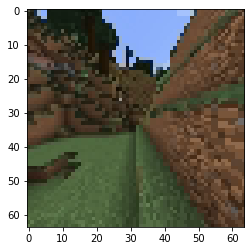

float32
(1, 64, 64, 3)
  10/1000 [..............................] - ETA: 30:40 - loss: 5.6565 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


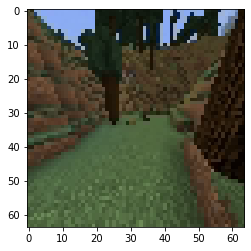

float32
(1, 64, 64, 3)
  11/1000 [..............................] - ETA: 31:10 - loss: 5.6571 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


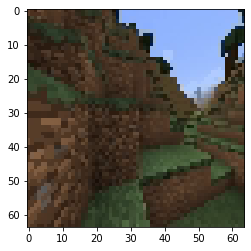

float32
(1, 64, 64, 3)
  12/1000 [..............................] - ETA: 31:23 - loss: 5.6575 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


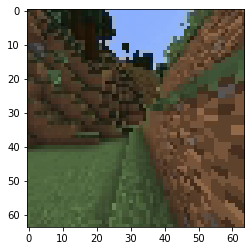

float32
(1, 64, 64, 3)
  13/1000 [..............................] - ETA: 31:29 - loss: 5.6579 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


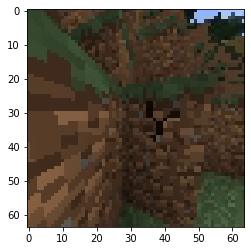

float32
(1, 64, 64, 3)
  14/1000 [..............................] - ETA: 31:22 - loss: 5.6582 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


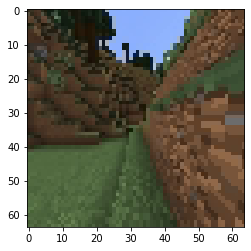

float32
(1, 64, 64, 3)
  15/1000 [..............................] - ETA: 32:07 - loss: 5.6585 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


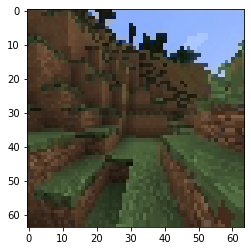

float32
(1, 64, 64, 3)
  16/1000 [..............................] - ETA: 32:28 - loss: 5.6588 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


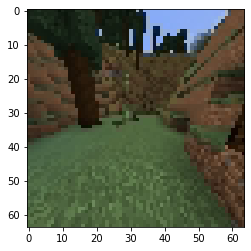

float32
(1, 64, 64, 3)
  17/1000 [..............................] - ETA: 33:40 - loss: 5.6590 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


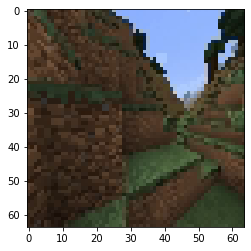

float32
(1, 64, 64, 3)
  18/1000 [..............................] - ETA: 33:17 - loss: 5.6592 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


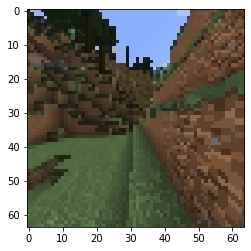

float32
(1, 64, 64, 3)
  19/1000 [..............................] - ETA: 32:35 - loss: 5.6594 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


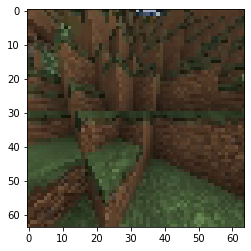

float32
(1, 64, 64, 3)
  20/1000 [..............................] - ETA: 32:49 - loss: 5.6595 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


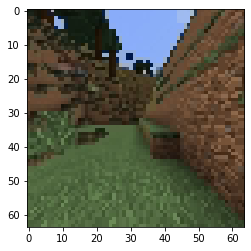

float32
(1, 64, 64, 3)
  21/1000 [..............................] - ETA: 32:49 - loss: 5.6597 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


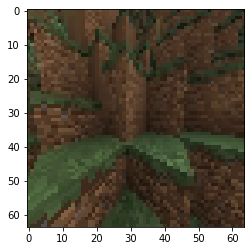

float32
(1, 64, 64, 3)
  22/1000 [..............................] - ETA: 32:44 - loss: 5.6598 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


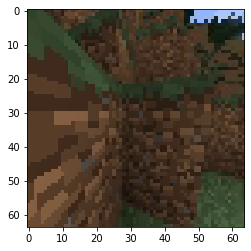

float32
(1, 64, 64, 3)
  23/1000 [..............................] - ETA: 32:51 - loss: 5.6599 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


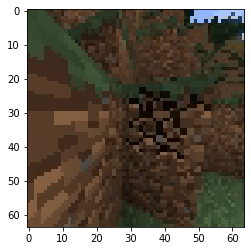

float32
(1, 64, 64, 3)
  24/1000 [..............................] - ETA: 32:56 - loss: 5.6600 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


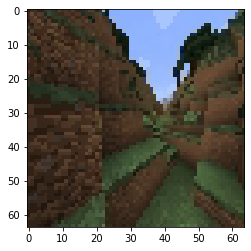

float32
(1, 64, 64, 3)
  25/1000 [..............................] - ETA: 33:06 - loss: 5.6601 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


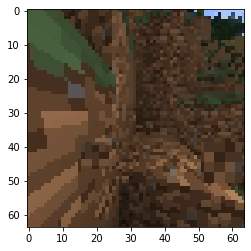

float32
(1, 64, 64, 3)
  26/1000 [..............................] - ETA: 33:28 - loss: 5.6602 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


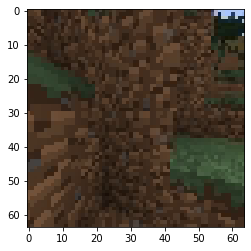

float32
(1, 64, 64, 3)
  27/1000 [..............................] - ETA: 33:43 - loss: 5.6603 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


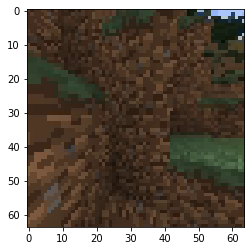

float32
(1, 64, 64, 3)
  28/1000 [..............................] - ETA: 33:47 - loss: 5.6604 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


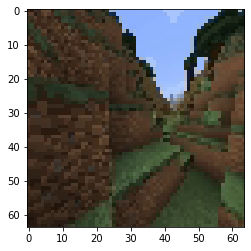

float32
(1, 64, 64, 3)
  29/1000 [..............................] - ETA: 33:46 - loss: 5.6604 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


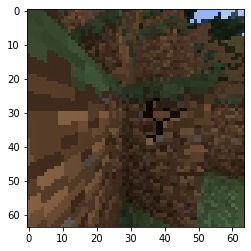

float32
(1, 64, 64, 3)
  30/1000 [..............................] - ETA: 33:44 - loss: 5.6605 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


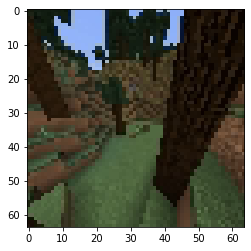

float32
(1, 64, 64, 3)
  31/1000 [..............................] - ETA: 33:36 - loss: 5.6606 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


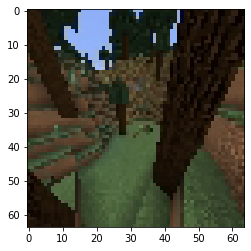

float32
(1, 64, 64, 3)
  32/1000 [..............................] - ETA: 33:34 - loss: 5.6606 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


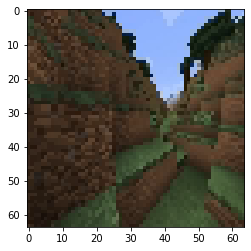

float32
(1, 64, 64, 3)
  33/1000 [..............................] - ETA: 33:28 - loss: 5.6607 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


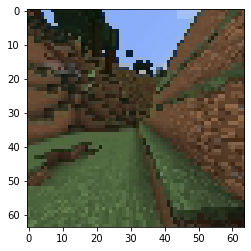

float32
(1, 64, 64, 3)
  34/1000 [>.............................] - ETA: 33:18 - loss: 5.6607 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


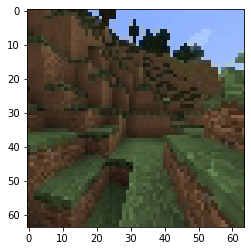

float32
(1, 64, 64, 3)
  35/1000 [>.............................] - ETA: 33:14 - loss: 5.6608 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


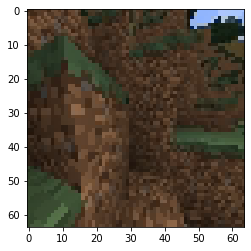

float32
(1, 64, 64, 3)
  36/1000 [>.............................] - ETA: 33:09 - loss: 5.6608 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


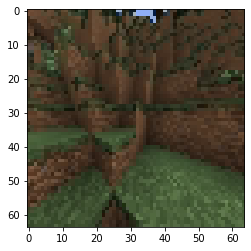

float32
(1, 64, 64, 3)
  37/1000 [>.............................] - ETA: 33:19 - loss: 5.6609 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


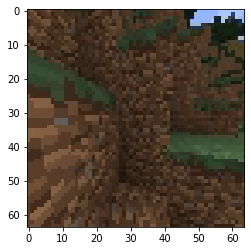

float32
(1, 64, 64, 3)
  38/1000 [>.............................] - ETA: 33:22 - loss: 5.6609 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


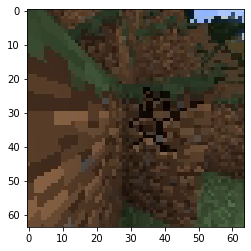

float32
(1, 64, 64, 3)
  39/1000 [>.............................] - ETA: 33:22 - loss: 5.6610 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


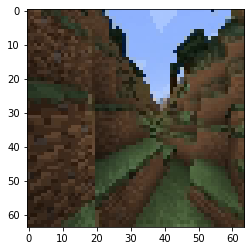

float32
(1, 64, 64, 3)
  40/1000 [>.............................] - ETA: 33:18 - loss: 5.6610 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


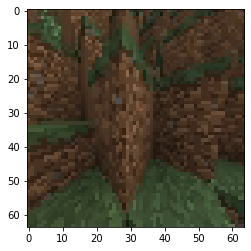

float32
(1, 64, 64, 3)
  41/1000 [>.............................] - ETA: 33:13 - loss: 5.6610 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


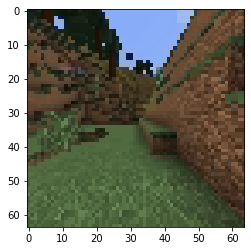

float32
(1, 64, 64, 3)
  42/1000 [>.............................] - ETA: 33:10 - loss: 5.6611 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


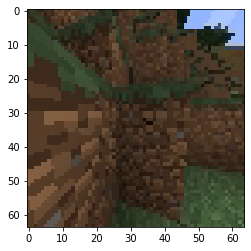

float32
(1, 64, 64, 3)
  43/1000 [>.............................] - ETA: 33:10 - loss: 5.6611 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


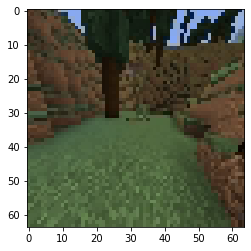

float32
(1, 64, 64, 3)
  44/1000 [>.............................] - ETA: 33:06 - loss: 5.6611 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


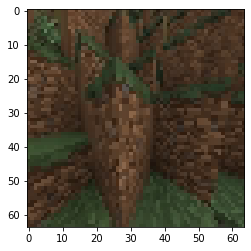

float32
(1, 64, 64, 3)
  45/1000 [>.............................] - ETA: 33:07 - loss: 5.6612 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


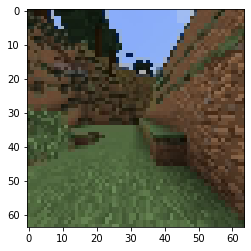

float32
(1, 64, 64, 3)
  46/1000 [>.............................] - ETA: 33:07 - loss: 5.6612 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


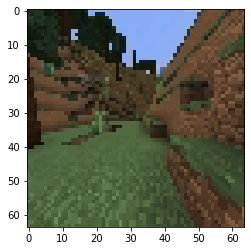

float32
(1, 64, 64, 3)
  47/1000 [>.............................] - ETA: 33:09 - loss: 5.6612 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


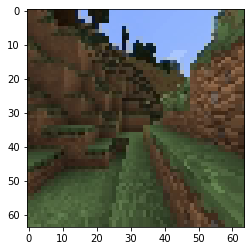

float32
(1, 64, 64, 3)
  48/1000 [>.............................] - ETA: 33:06 - loss: 5.6613 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


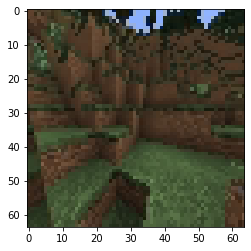

float32
(1, 64, 64, 3)
  49/1000 [>.............................] - ETA: 33:07 - loss: 5.6613 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


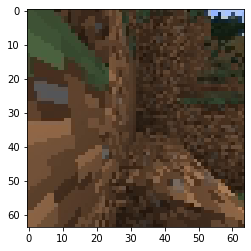

float32
(1, 64, 64, 3)
  50/1000 [>.............................] - ETA: 33:22 - loss: 5.6613 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


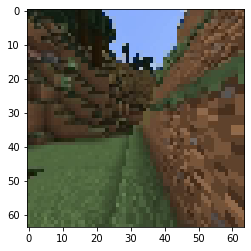

float32
(1, 64, 64, 3)
  51/1000 [>.............................] - ETA: 33:22 - loss: 5.6613 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


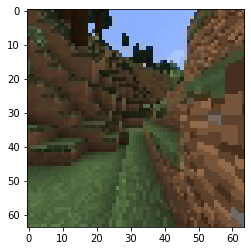

float32
(1, 64, 64, 3)
  52/1000 [>.............................] - ETA: 33:18 - loss: 5.6614 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


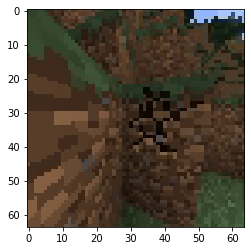

float32
(1, 64, 64, 3)
  53/1000 [>.............................] - ETA: 33:30 - loss: 5.6614 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


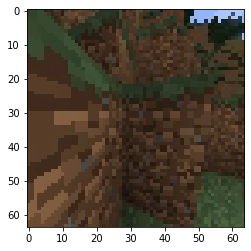

float32
(1, 64, 64, 3)
  54/1000 [>.............................] - ETA: 33:23 - loss: 5.6614 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


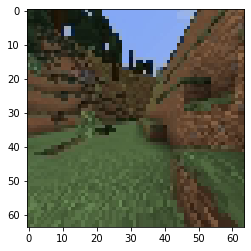

float32
(1, 64, 64, 3)
  55/1000 [>.............................] - ETA: 33:18 - loss: 5.6614 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


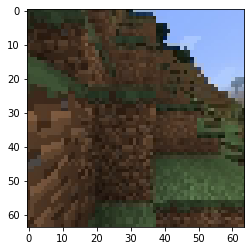

float32
(1, 64, 64, 3)
  56/1000 [>.............................] - ETA: 33:13 - loss: 5.6614 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


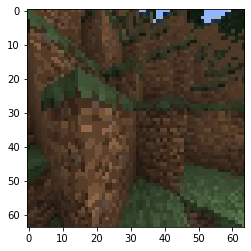

float32
(1, 64, 64, 3)
  57/1000 [>.............................] - ETA: 33:09 - loss: 5.6615 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


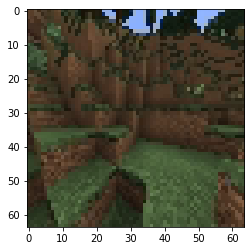

float32
(1, 64, 64, 3)
  58/1000 [>.............................] - ETA: 33:05 - loss: 5.6615 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


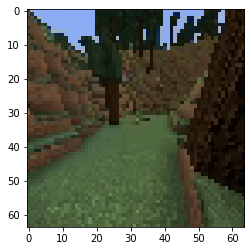

float32
(1, 64, 64, 3)
  59/1000 [>.............................] - ETA: 32:58 - loss: 5.6615 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


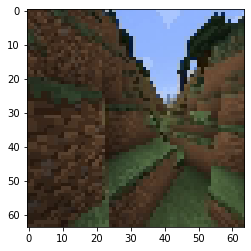

float32
(1, 64, 64, 3)
  60/1000 [>.............................] - ETA: 32:52 - loss: 5.6615 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


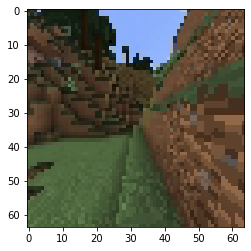

float32
(1, 64, 64, 3)
  61/1000 [>.............................] - ETA: 32:49 - loss: 5.6615 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


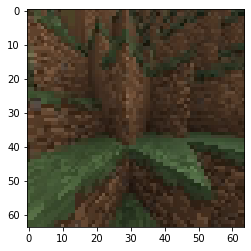

float32
(1, 64, 64, 3)
  62/1000 [>.............................] - ETA: 32:45 - loss: 5.6615 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


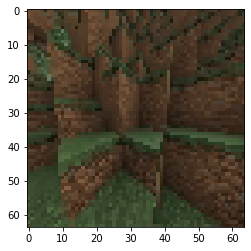

float32
(1, 64, 64, 3)
  63/1000 [>.............................] - ETA: 32:41 - loss: 5.6616 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


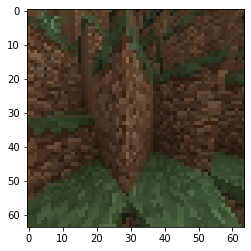

float32
(1, 64, 64, 3)
  64/1000 [>.............................] - ETA: 32:37 - loss: 5.6616 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


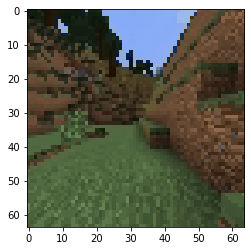

float32
(1, 64, 64, 3)
  65/1000 [>.............................] - ETA: 32:31 - loss: 5.6616 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


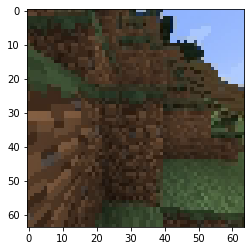

float32
(1, 64, 64, 3)
  66/1000 [>.............................] - ETA: 32:25 - loss: 5.6616 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


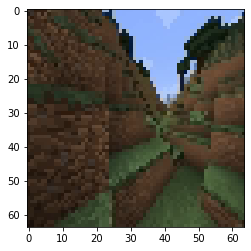

float32
(1, 64, 64, 3)
  67/1000 [=>............................] - ETA: 32:19 - loss: 5.6616 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


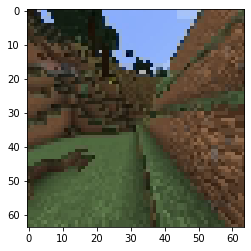

float32
(1, 64, 64, 3)
  68/1000 [=>............................] - ETA: 32:14 - loss: 5.6616 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


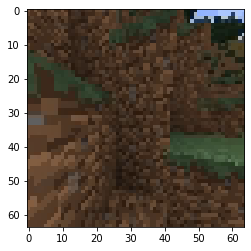

float32
(1, 64, 64, 3)
  69/1000 [=>............................] - ETA: 32:11 - loss: 5.6616 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


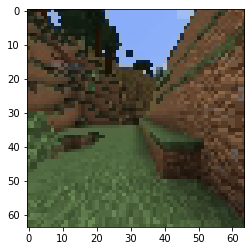

float32
(1, 64, 64, 3)
  70/1000 [=>............................] - ETA: 32:05 - loss: 5.6616 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


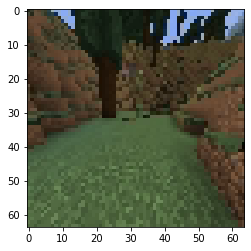

float32
(1, 64, 64, 3)
  71/1000 [=>............................] - ETA: 32:01 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


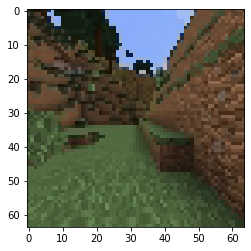

float32
(1, 64, 64, 3)
  72/1000 [=>............................] - ETA: 31:58 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


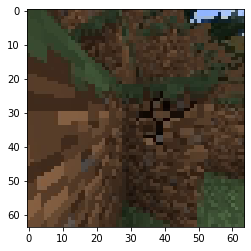

float32
(1, 64, 64, 3)
  73/1000 [=>............................] - ETA: 31:55 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


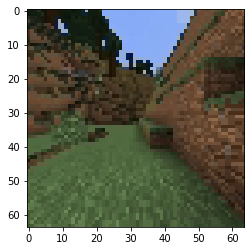

float32
(1, 64, 64, 3)
  74/1000 [=>............................] - ETA: 31:49 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


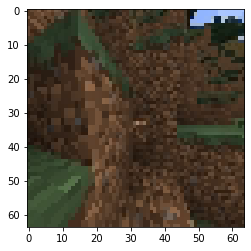

float32
(1, 64, 64, 3)
  75/1000 [=>............................] - ETA: 31:45 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


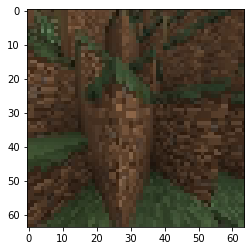

float32
(1, 64, 64, 3)
  76/1000 [=>............................] - ETA: 31:41 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


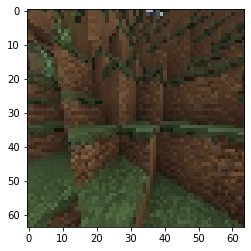

float32
(1, 64, 64, 3)
  77/1000 [=>............................] - ETA: 31:37 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


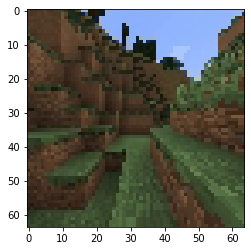

float32
(1, 64, 64, 3)
  78/1000 [=>............................] - ETA: 31:33 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


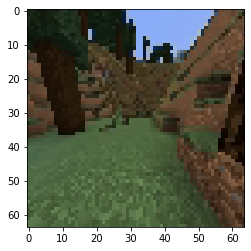

float32
(1, 64, 64, 3)
  79/1000 [=>............................] - ETA: 31:30 - loss: 5.6617 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


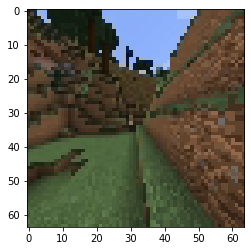

float32
(1, 64, 64, 3)
  80/1000 [=>............................] - ETA: 31:25 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


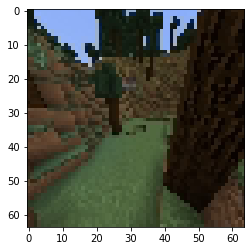

float32
(1, 64, 64, 3)
  81/1000 [=>............................] - ETA: 31:21 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


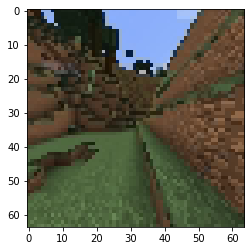

float32
(1, 64, 64, 3)
  82/1000 [=>............................] - ETA: 31:18 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


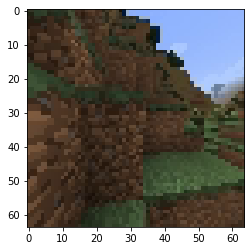

float32
(1, 64, 64, 3)
  83/1000 [=>............................] - ETA: 31:14 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


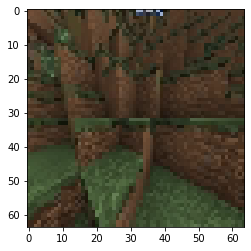

float32
(1, 64, 64, 3)
  84/1000 [=>............................] - ETA: 31:10 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


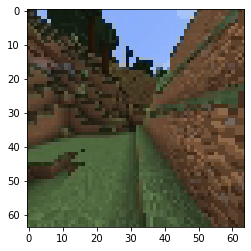

float32
(1, 64, 64, 3)
  85/1000 [=>............................] - ETA: 31:06 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


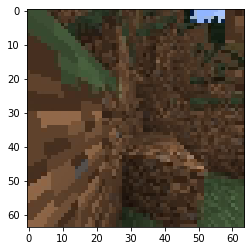

float32
(1, 64, 64, 3)
  86/1000 [=>............................] - ETA: 31:01 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


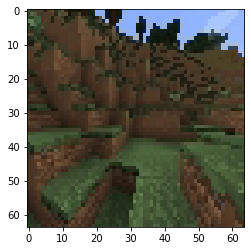

float32
(1, 64, 64, 3)
  87/1000 [=>............................] - ETA: 30:58 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


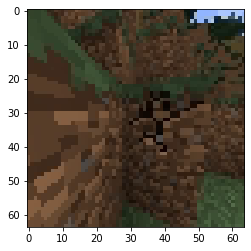

float32
(1, 64, 64, 3)
  88/1000 [=>............................] - ETA: 30:55 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


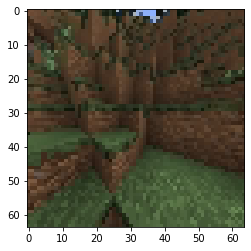

float32
(1, 64, 64, 3)
  89/1000 [=>............................] - ETA: 30:52 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


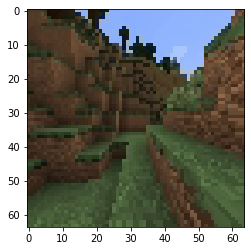

float32
(1, 64, 64, 3)
  90/1000 [=>............................] - ETA: 30:48 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


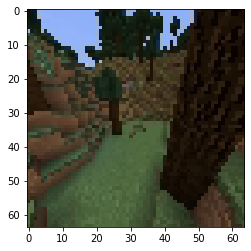

float32
(1, 64, 64, 3)
  91/1000 [=>............................] - ETA: 30:45 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


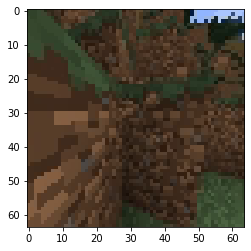

float32
(1, 64, 64, 3)
  92/1000 [=>............................] - ETA: 30:42 - loss: 5.6618 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


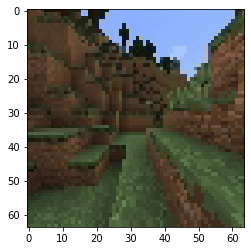

float32
(1, 64, 64, 3)
  93/1000 [=>............................] - ETA: 30:39 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


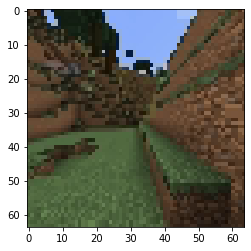

float32
(1, 64, 64, 3)
  94/1000 [=>............................] - ETA: 30:36 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


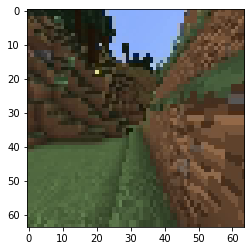

float32
(1, 64, 64, 3)
  95/1000 [=>............................] - ETA: 30:32 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


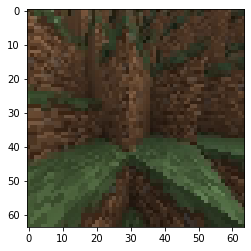

float32
(1, 64, 64, 3)
  96/1000 [=>............................] - ETA: 30:29 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


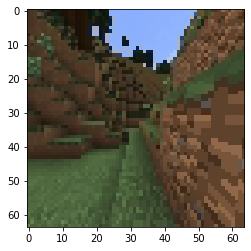

float32
(1, 64, 64, 3)
  97/1000 [=>............................] - ETA: 30:26 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


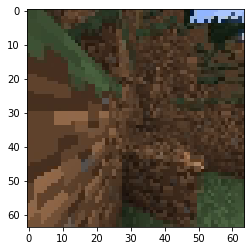

float32
(1, 64, 64, 3)
  98/1000 [=>............................] - ETA: 30:23 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


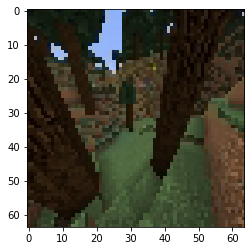

float32
(1, 64, 64, 3)
  99/1000 [=>............................] - ETA: 30:20 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


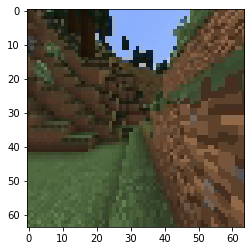

float32
(1, 64, 64, 3)
 100/1000 [==>...........................] - ETA: 30:16 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


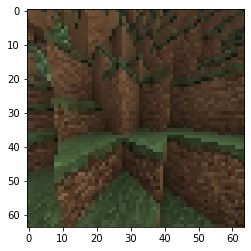

float32
(1, 64, 64, 3)
 101/1000 [==>...........................] - ETA: 30:13 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


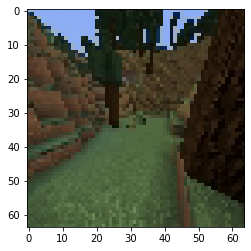

float32
(1, 64, 64, 3)
 102/1000 [==>...........................] - ETA: 30:10 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


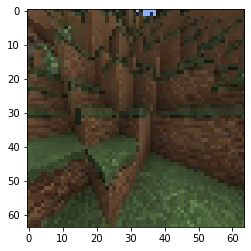

float32
(1, 64, 64, 3)
 103/1000 [==>...........................] - ETA: 30:07 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


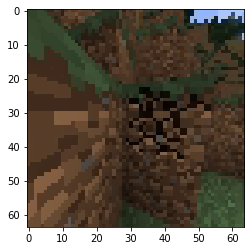

float32
(1, 64, 64, 3)
 104/1000 [==>...........................] - ETA: 30:09 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


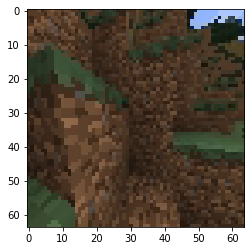

float32
(1, 64, 64, 3)
 105/1000 [==>...........................] - ETA: 30:05 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


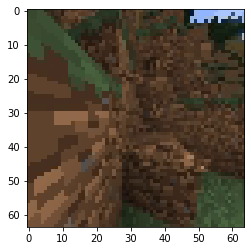

float32
(1, 64, 64, 3)
 106/1000 [==>...........................] - ETA: 30:01 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


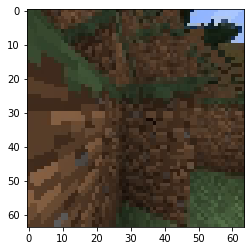

float32
(1, 64, 64, 3)
 107/1000 [==>...........................] - ETA: 29:58 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


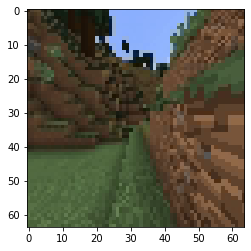

float32
(1, 64, 64, 3)
 108/1000 [==>...........................] - ETA: 29:54 - loss: 5.6619 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


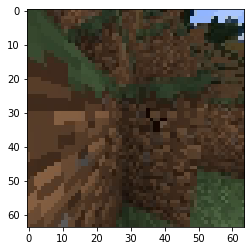

float32
(1, 64, 64, 3)
 109/1000 [==>...........................] - ETA: 29:50 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


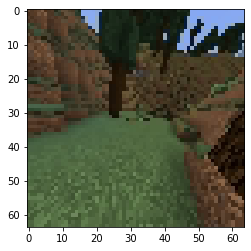

float32
(1, 64, 64, 3)
 110/1000 [==>...........................] - ETA: 29:47 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


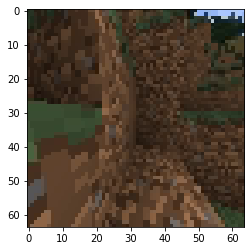

float32
(1, 64, 64, 3)
 111/1000 [==>...........................] - ETA: 29:43 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


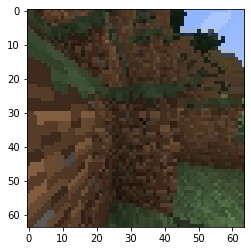

float32
(1, 64, 64, 3)
 112/1000 [==>...........................] - ETA: 29:40 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


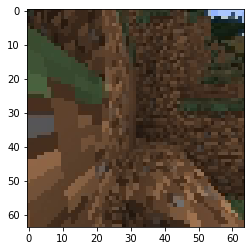

float32
(1, 64, 64, 3)
 113/1000 [==>...........................] - ETA: 29:37 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


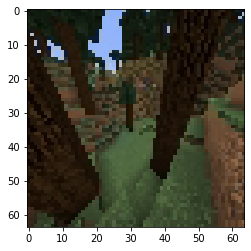

float32
(1, 64, 64, 3)
 114/1000 [==>...........................] - ETA: 29:33 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


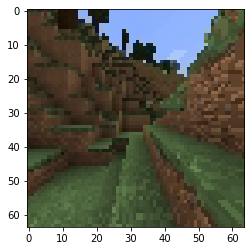

float32
(1, 64, 64, 3)
 115/1000 [==>...........................] - ETA: 29:31 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


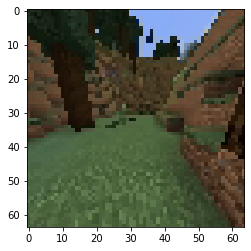

float32
(1, 64, 64, 3)
 116/1000 [==>...........................] - ETA: 29:31 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


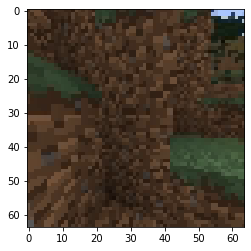

float32
(1, 64, 64, 3)
 117/1000 [==>...........................] - ETA: 29:29 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


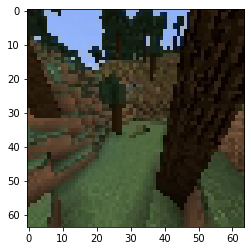

float32
(1, 64, 64, 3)
 118/1000 [==>...........................] - ETA: 29:25 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


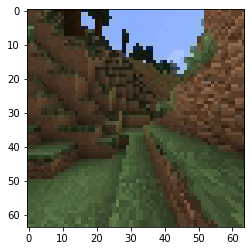

float32
(1, 64, 64, 3)
 119/1000 [==>...........................] - ETA: 29:22 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


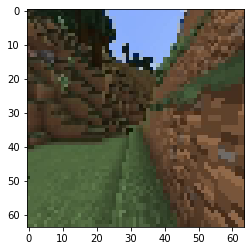

float32
(1, 64, 64, 3)
 120/1000 [==>...........................] - ETA: 29:20 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


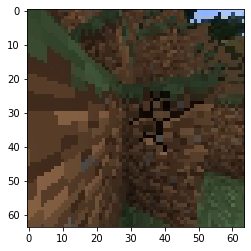

float32
(1, 64, 64, 3)
 121/1000 [==>...........................] - ETA: 29:16 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


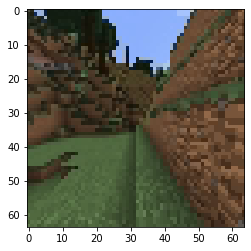

float32
(1, 64, 64, 3)
 122/1000 [==>...........................] - ETA: 29:13 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


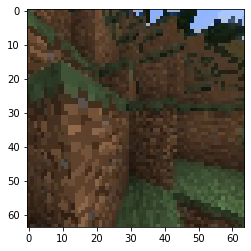

float32
(1, 64, 64, 3)
 123/1000 [==>...........................] - ETA: 29:10 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


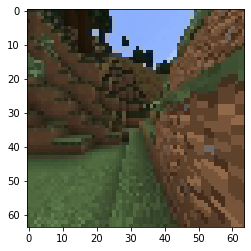

float32
(1, 64, 64, 3)
 124/1000 [==>...........................] - ETA: 29:07 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


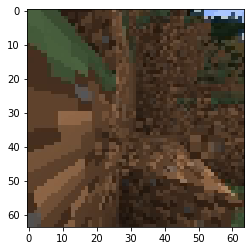

float32
(1, 64, 64, 3)
 125/1000 [==>...........................] - ETA: 29:04 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


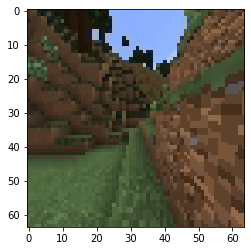

float32
(1, 64, 64, 3)
 126/1000 [==>...........................] - ETA: 29:01 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


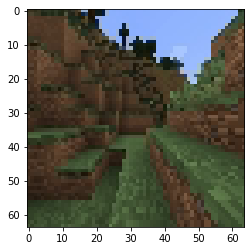

float32
(1, 64, 64, 3)
 127/1000 [==>...........................] - ETA: 28:58 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


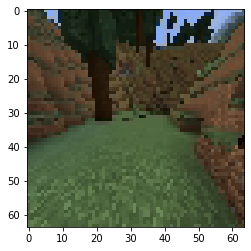

float32
(1, 64, 64, 3)
 128/1000 [==>...........................] - ETA: 28:56 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


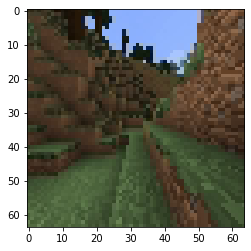

float32
(1, 64, 64, 3)
 129/1000 [==>...........................] - ETA: 28:53 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


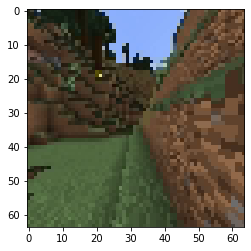

float32
(1, 64, 64, 3)
 130/1000 [==>...........................] - ETA: 28:49 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


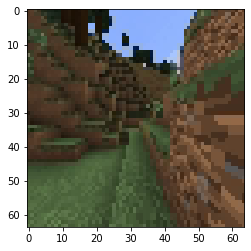

float32
(1, 64, 64, 3)
 131/1000 [==>...........................] - ETA: 28:46 - loss: 5.6620 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


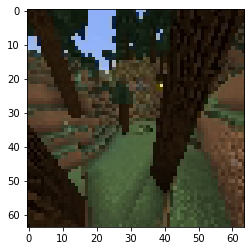

float32
(1, 64, 64, 3)
 132/1000 [==>...........................] - ETA: 28:43 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


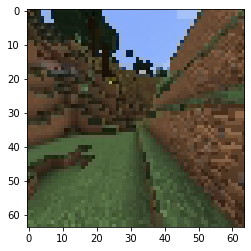

float32
(1, 64, 64, 3)
 133/1000 [==>...........................] - ETA: 28:40 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


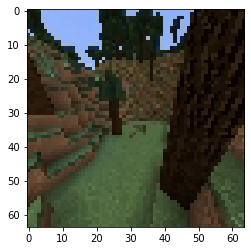

float32
(1, 64, 64, 3)
 134/1000 [===>..........................] - ETA: 28:37 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


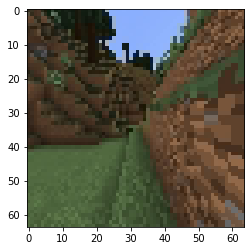

float32
(1, 64, 64, 3)
 135/1000 [===>..........................] - ETA: 28:35 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


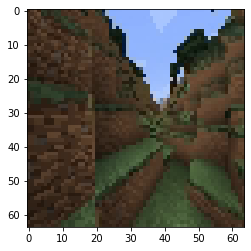

float32
(1, 64, 64, 3)
 136/1000 [===>..........................] - ETA: 28:34 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


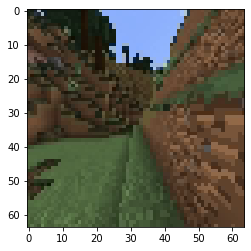

float32
(1, 64, 64, 3)
 137/1000 [===>..........................] - ETA: 28:32 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


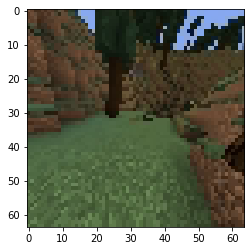

float32
(1, 64, 64, 3)
 138/1000 [===>..........................] - ETA: 28:30 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


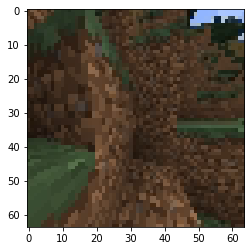

float32
(1, 64, 64, 3)
 139/1000 [===>..........................] - ETA: 28:27 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


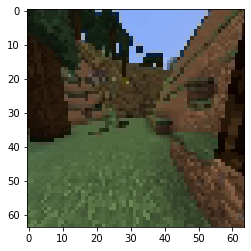

float32
(1, 64, 64, 3)
 140/1000 [===>..........................] - ETA: 28:24 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


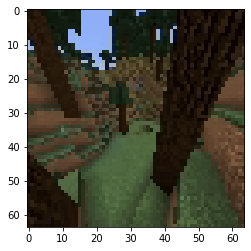

float32
(1, 64, 64, 3)
 141/1000 [===>..........................] - ETA: 28:22 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


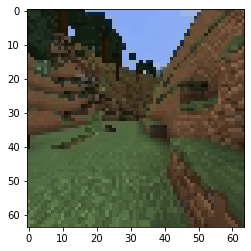

float32
(1, 64, 64, 3)
 142/1000 [===>..........................] - ETA: 28:19 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


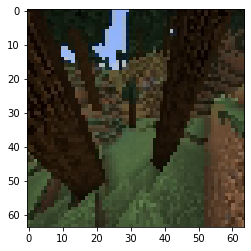

float32
(1, 64, 64, 3)
 143/1000 [===>..........................] - ETA: 28:17 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


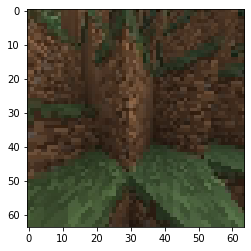

float32
(1, 64, 64, 3)
 144/1000 [===>..........................] - ETA: 28:15 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


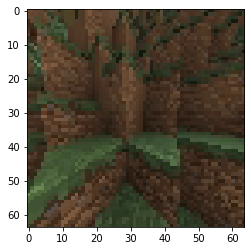

float32
(1, 64, 64, 3)
 145/1000 [===>..........................] - ETA: 28:16 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


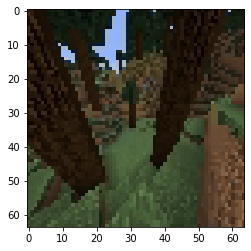

float32
(1, 64, 64, 3)
 146/1000 [===>..........................] - ETA: 28:17 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


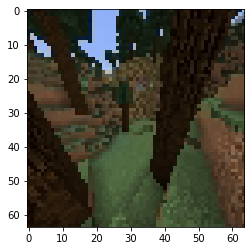

float32
(1, 64, 64, 3)
 147/1000 [===>..........................] - ETA: 28:16 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


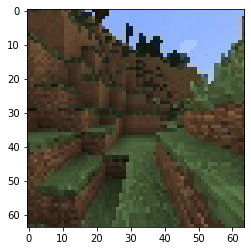

float32
(1, 64, 64, 3)
 148/1000 [===>..........................] - ETA: 28:14 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


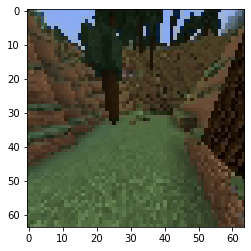

float32
(1, 64, 64, 3)
 149/1000 [===>..........................] - ETA: 28:12 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


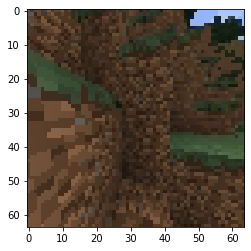

float32
(1, 64, 64, 3)
 150/1000 [===>..........................] - ETA: 28:12 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


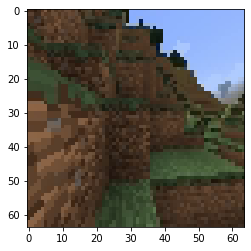

float32
(1, 64, 64, 3)
 151/1000 [===>..........................] - ETA: 28:10 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


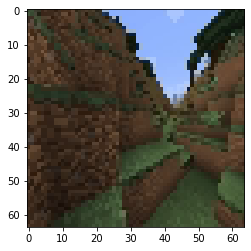

float32
(1, 64, 64, 3)
 152/1000 [===>..........................] - ETA: 28:09 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


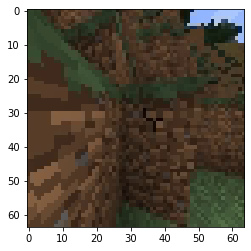

float32
(1, 64, 64, 3)
 153/1000 [===>..........................] - ETA: 28:08 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


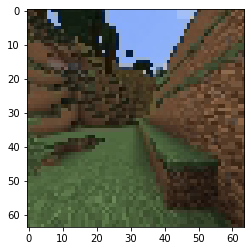

float32
(1, 64, 64, 3)
 154/1000 [===>..........................] - ETA: 28:07 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


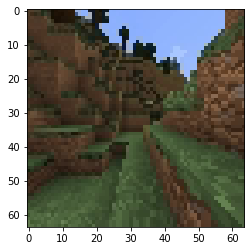

float32
(1, 64, 64, 3)
 155/1000 [===>..........................] - ETA: 28:08 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


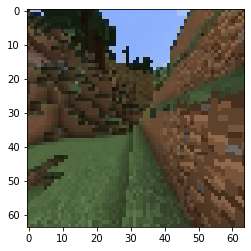

float32
(1, 64, 64, 3)
 156/1000 [===>..........................] - ETA: 28:06 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


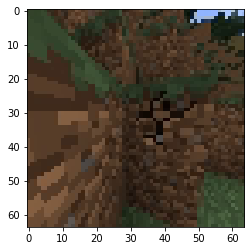

float32
(1, 64, 64, 3)
 157/1000 [===>..........................] - ETA: 28:07 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


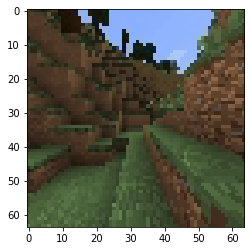

float32
(1, 64, 64, 3)
 158/1000 [===>..........................] - ETA: 28:05 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


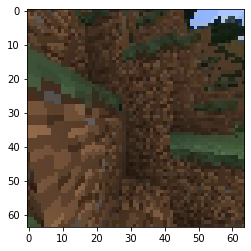

float32
(1, 64, 64, 3)
 159/1000 [===>..........................] - ETA: 28:04 - loss: 5.6621 - accuracy: 0.0000e+00[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)]
(1, 22511616)


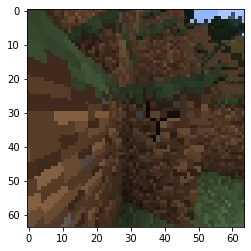

float32
(1, 64, 64, 3)
 160/1000 [===>..........................] - ETA: 28:03 - loss: 5.6621 - accuracy: 0.0000e+00WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1000 batches). You may need to use the repeat() function when building your dataset.
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000

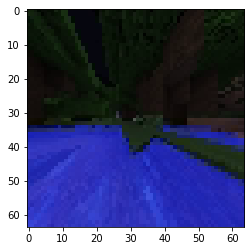

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

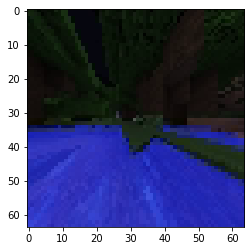

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

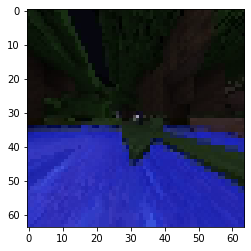

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

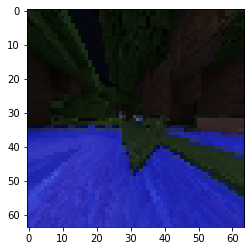

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

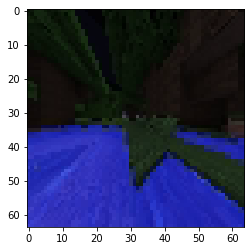

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

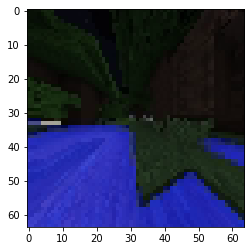

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

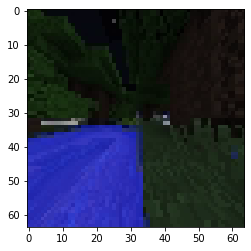

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

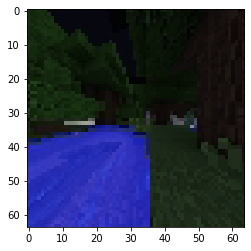

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

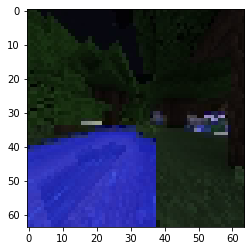

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

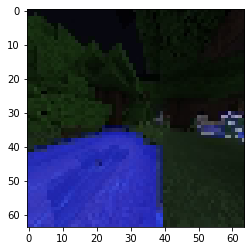

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

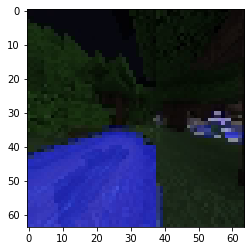

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

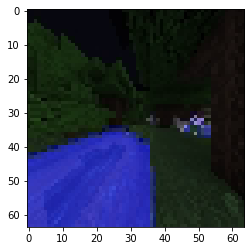

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

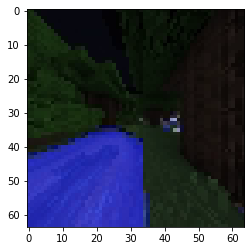

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

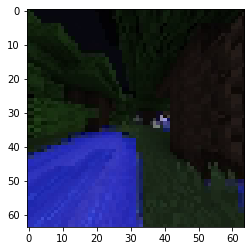

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

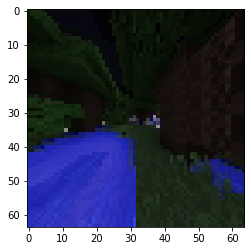

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

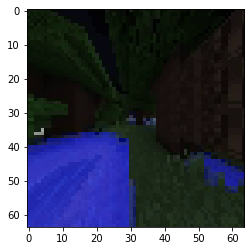

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

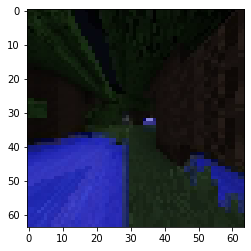

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

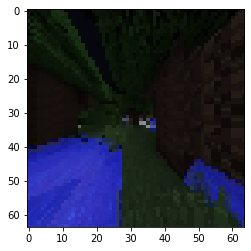

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

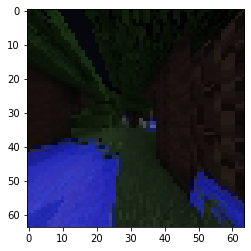

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

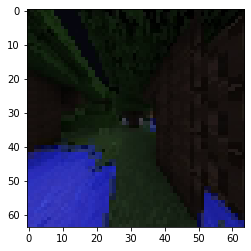

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

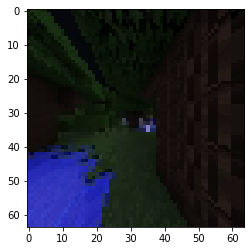

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

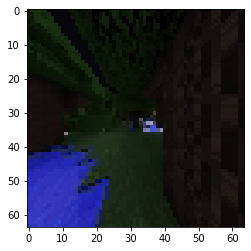

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

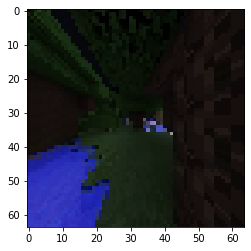

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

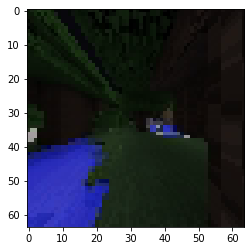

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

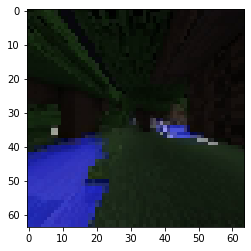

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

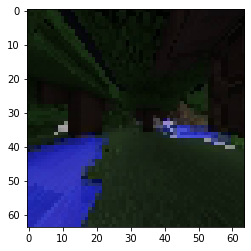

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

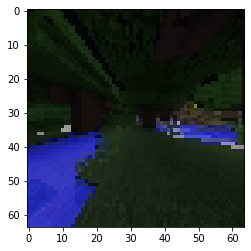

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

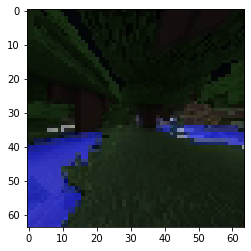

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

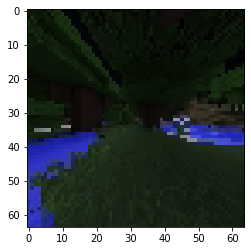

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

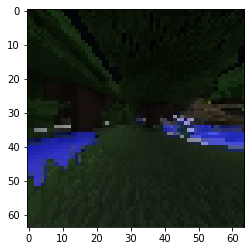

float32
(1, 64, 64, 3)
[array([ 2.22639996e-03,  8.03461764e-03,  1.28476694e-02,  4.03235853e-03,
       -4.89235437e-03, -7.12914811e-03,  9.49178793e-05,  1.07285315e-02,
        2.20747273e-02,  3.52114178e-02,  0.00000000e+00,  1.08747005e-01,
        6.79980218e-02,  6.64044693e-02,  6.00635074e-02,  7.86668435e-02,
        7.20670149e-02,  6.16072901e-02,  4.90816981e-02,  3.58605236e-02,
        2.97999065e-02,  2.97480226e-02,  3.44167352e-02,  4.21117656e-02,
        5.12950644e-02,  6.08211644e-02,  7.55831376e-02,  1.21492468e-01,
        1.57040760e-01,  0.00000000e+00,  3.85928661e-01,  2.15971023e-01,
        0.00000000e+00,  4.56462234e-01,  2.34718159e-01,  2.36876994e-01,
        2.38093585e-01,  2.38736734e-01,  2.39053026e-01,  2.39207312e-01,
        2.39253119e-01,  2.39169255e-01,  2.39055276e-01,  2.38920838e-01,
        2.38772407e-01,  2.38614291e-01,  2.38449365e-01,  2.38279536e-01,
        2.38106102e-01,  2.37929896e-01,  2.37751484e-01,  2.37571254e-01,
 

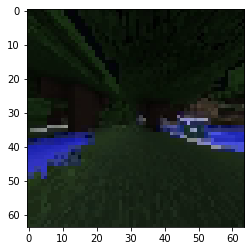

float32
(1, 64, 64, 3)
 160/1000 [===>..........................] - 359s 2s/step - loss: 5.6621 - accuracy: 0.0000e+00 - val_loss: 16.1033 - val_accuracy: 0.0000e+00


In [315]:
conv = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, 5, activation="relu", padding="same", input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Conv2D(64, 5, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Conv2D(64, 5, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])
    
conv.compile(loss="mse", optimizer="adam", metrics="accuracy")
    
conv.fit_generator(generator = training_gen,
                    steps_per_epoch = int(1000 // batch_size),
                    epochs = 1,
                    verbose = 1,
                    validation_data = valid_gen,
                    validation_steps = int(100 // batch_size))
                  



In [88]:
training_data_path = "C:\\Users\\Robin\\Desktop\\deep_learning\\MineRLNavigateDense-v0"

def preprocess_data():
    training_valid_testing = [100, 50, 43]
    #to do: split the video frame and y data into even smaller data
    for folder in tqdm.tqdm(os.listdir(training_data_path)):
        for each in range(len(training_valid_testing)): 
            for j in range(each):
                path = os.path.join(training_data_path+"\\"+folder)
                training_data = np.load(path+"\\NDTRAIN.npy", allow_pickle=True)
                training_data[0] = np.array(training_data[0]).reshape(int(training_data[0].shape[0]/12288), 64, 64, 3)
                print(np.array(training_data[1])[-2][0])
                training_data[1] = np.concatenate(np.array(training_data[1]))
                print(training_data[1].shape)

                clustering = KMeans(n_clusters=32, random_state=0).fit_predict(training_data[1])

preprocess_data()

  0%|                                                  | 0/193 [00:00<?, ?it/s]

[0. 0.]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 11 has 2 dimension(s)